In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
from spotify_secret import keys
from collections import Counter

from collab_net import collabNet

import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import powerlaw
import collections


In [ ]:
rap_collab_net = collabNet(drake, limit=2, attr_filename='rap_attr.json', collabs_filename='rap_collab.csv')

In [ ]:
drake = "3TVXtAsR1Inumwj472S9r4"
deadmau5 = "2CIMQHirSU0MQqyYHq0eOx"
dillon = "5R3Hr2cnCCjt220Jmt2xLf"
diplo = "5fMUXHkw8R8eOP2RNVYEZX"
kanye = "5K4W6rqBFWDnAN6FQUkS6x"
carl = "19SmlbABtI4bXz864MLqOS"
e40 = "3crnzLy8R4lVwaigKEOz7V"
gucci = "13y7CgLHjMVRMDqxdx0Xdo"
asap = "13ubrt8QOOCPljQ2FL1Kca"
charlotte = "1lJhME1ZpzsEa5M0wW6Mso"

rap_collab_net = collabNet(drake, limit=200, attr_filename='rap_attr_200.json', collabs_filename='rap_collab.csv')

edm_collab_net = collabNet(deadmau5, limit=200, attr_filename='edm_attr.json', collabs_filename='edm_collab.csv')

In [ ]:
nx.write_gexf(rap_graph, path='big_rap_graph.gexf')
nx.write_gexf(edm_graph, path='big_edm_graph.gexf')

In [3]:
rap_collabs = pd.read_csv('rap_collab_300.csv')
edm_collabs = pd.read_csv('edm_collab_300.csv')

In [4]:
rap_collabs = rap_collabs.drop(columns=['Unnamed: 0'])
edm_collabs = edm_collabs.drop(columns=['Unnamed: 0'])

In [5]:
rap_collabs.head()

,artist,collab,weight
0,Drake,Giveon,1
1,Drake,Chris Brown,2
2,Drake,Future,13
3,Future,Drake,11
4,Future,Young Thug,24


In [6]:
edm_collabs.head()

,artist,collab,weight
0,deadmau5,Morgan Page,1
1,deadmau5,Tinlicker,1
2,deadmau5,Grégory Reveret,1
3,deadmau5,Rinzen,2
4,deadmau5,Seismal D,1


In [7]:
rap_graph = nx.from_pandas_edgelist(rap_collabs, source='artist', target='collab', edge_attr='weight')
edm_graph = nx.from_pandas_edgelist(edm_collabs, source='artist', target='collab', edge_attr='weight')

## Artist Attribute Exploration

In [10]:
import json

In [11]:
with open('edm_attr_300.json', 'r') as f:
    edm_attr = json.load(f)

with open('rap_attr_300.json', 'r') as f:
    rap_attr = json.load(f)

In [12]:
import re

In [13]:
def get_genres(art_attr, filters=[], keeps=[]):
    genres = list()
    keep_artists = list()
    not_in_genre_artists = list()
    for i, v in art_attr.items():
        curr_genres = v['genres']
        genres.extend(curr_genres)

        if any(keep in genre for keep in keeps for genre in curr_genres):
            continue
        elif any(filt in genre for filt in filters for genre in curr_genres):
            not_in_genre_artists.append(i)

    return set(genres), set(not_in_genre_artists)

In [ ]:
strs = ['dance pop', 'pop', 'post-teen pop']
substrs = ['pop']
any(substr in string for substr in substrs for string in strs)

In [14]:
edm_genres_dirty, edm_filtered_artist = get_genres(edm_attr, filters=["rap", 'latin', 'rock', 'hip hop', 'pop', 'country', 'christian'], keeps=['house', 'techno', 'europop', 'brostep', 'dubstep', 'dub', 'trance', 'edm', 'electro', 'electronic', 'tech'])
print(len(edm_filtered_artist))

256


In [15]:
rap_genres_dirty, rap_filtered_artist = get_genres(rap_attr, filters=["house", "techno", "rock", "edm", 'pop', 'country', 'europop', 'brostep', 'dubstep', 'dub', 'trance', 'edm', 'electro', 'electronic', 'tech'], keeps=["rap", "hip hop", 'trap'])
print(len(rap_filtered_artist))

344


In [16]:
filtered_genres = list()
for art in edm_filtered_artist:
    filtered_genres.extend(edm_attr[art]['genres'])

set(filtered_genres)

{'acoustic pop',
 'afro dancehall',
 'afropop',
 'afroswing',
 'alabama rap',
 'albanian pop',
 'album rock',
 'alt z',
 'alternative ccm',
 'alternative country',
 'alternative dance',
 'alternative hip hop',
 'alternative pop',
 'alternative r&b',
 'alternative rock',
 'ambient worship',
 'anime',
 'anthem worship',
 'art pop',
 'art rock',
 'atl hip hop',
 'atl trap',
 'atlanta indie',
 'atlanta punk',
 'australian dance',
 'australian hip hop',
 'australian indie',
 'australian pop',
 'australian underground hip hop',
 'austropop',
 'azonto',
 'azontobeats',
 'baltimore hip hop',
 'barbadian pop',
 'bassline',
 'battle rap',
 'birmingham grime',
 'birmingham hip hop',
 'bmore',
 'boom bap',
 'bounce',
 'bow pop',
 'boy band',
 'brill building pop',
 'bristol indie',
 'british indie rock',
 'british soul',
 'britpop',
 'cali rap',
 'canadian contemporary r&b',
 'canadian hip hop',
 'canadian indie',
 'canadian latin',
 'canadian old school hip hop',
 'canadian pop',
 'candy pop',
 '

## Data Analysis

In [17]:
rap_graph.remove_nodes_from(rap_filtered_artist)
edm_graph.remove_nodes_from(edm_filtered_artist)

In [18]:
print(f"rap network nodes: {rap_graph.number_of_nodes()}")
print(f"rap network edges: {rap_graph.number_of_edges()}")

print(f"edm network nodes: {edm_graph.number_of_nodes()}")
print(f"edm network edges: {edm_graph.number_of_edges()}")

rap network nodes: 3615
rap network edges: 11005
edm network nodes: 1449
edm network edges: 1821


In [19]:
def degrees(g):
    weighted_deg = g.degree(weight='weight')
    deg = g.degree()
    weighted_avg_degree = float(sum(dict(weighted_deg).values()))/len(weighted_deg)
    avg_degree = float(sum(dict(deg).values()))/len(deg)

    return avg_degree, weighted_avg_degree

rap_avg_deg, rap_avg_wdeg = degrees(rap_graph)
print(rap_avg_deg, rap_avg_wdeg)

6.088520055325034 11.30179806362379


In [20]:
edm_avg_deg, edm_avg_wdeg = degrees(edm_graph)
print(edm_avg_deg, edm_avg_wdeg)

2.5134575569358177 4.3105590062111805


In [ ]:
[len(c) for c in sorted(nx.connected_components(edm_graph), key=len, reverse=True)]

In [21]:
rap_gc = max(nx.connected_components(rap_graph), key=len)
edm_gc = max(nx.connected_components(edm_graph), key=len)

print(len(rap_gc))
print(len(edm_gc))

3461
990


In [22]:
rap_subgraph = nx.subgraph(rap_graph, rap_gc)
edm_subgraph = nx.subgraph(edm_graph, edm_gc)

In [23]:
import time

In [24]:
start = time.time()
rap_avg_path = nx.average_shortest_path_length(rap_subgraph)
end = time.time()
print(f"Rap used {end - start}s")

start = time.time()
edm_avg_path = nx.average_shortest_path_length(edm_subgraph)
end = time.time()
print(f"EDM used {end - start}s")

print(rap_avg_path)
print(edm_avg_path)

Rap used 76.77278208732605s
EDM used 4.695590257644653s
3.4340809983415532
4.45030282603589


In [25]:
edm_weighted_avg_path = nx.average_shortest_path_length(edm_subgraph, weight='weight')
rap_weighted_avg_path = nx.average_shortest_path_length(rap_subgraph, weight='weight')

In [26]:
print(edm_weighted_avg_path)
print(rap_weighted_avg_path)

6.63908038933317
4.4622973079049295


In [27]:
rap_diam = nx.diameter(rap_subgraph)
edm_diam = nx.diameter(edm_subgraph)

In [28]:
print(rap_diam)

7


In [29]:
print(edm_diam)

12


In [33]:
edm_clustering = nx.average_clustering(edm_graph)
rap_clustering = nx.average_clustering(rap_graph)
print(edm_clustering)
print(rap_clustering)

0.3817702131306255
0.48883777830969005


In [ ]:
x = [(k, v['followers']) for k, v in rap_attr.items() if k not in rap_filtered_artist]
max(x, key=lambda x: x[1])

In [35]:
rap_followers = [v['followers'] for k, v in rap_attr.items() if k not in rap_filtered_artist]
rap_popularity = [v['popularity'] for k, v in rap_attr.items() if k not in rap_filtered_artist]
edm_followers = [v['followers'] for k, v in edm_attr.items() if k not in edm_filtered_artist]
edm_popularity = [v['popularity'] for k, v in edm_attr.items() if k not in edm_filtered_artist]

print(np.average(rap_followers ))
print(np.average(rap_popularity))
print(np.average(edm_followers ))
print(np.average(edm_popularity))

359865.89506507595
30.655097613882862
136926.82955771306
28.610571736785328


In [36]:
rap_n = rap_graph.number_of_nodes()
rap_e = rap_graph.number_of_edges()
edm_n = edm_graph.number_of_nodes()
edm_e = edm_graph.number_of_edges()

index = ['total artists (N)', 'total collaborations (E)', 'average followers', 'average popularity', 'avgerage degree', 'average weighted degree', 'size of giant component', '  as a percentage', 'clustering', 'mean distance', 'mean weighted distance', 'max. distance']

summary_stats = {"Rap":[rap_n,
                        rap_e,
                        np.average(rap_followers),
                        np.average(rap_popularity),
                        rap_avg_deg,
                        rap_avg_wdeg,
                        len(rap_gc),
                        round((len(rap_gc)/rap_n)*100, 2),
                        rap_clustering,
                        rap_avg_path,
                        rap_weighted_avg_path,
                        rap_diam],
                 "EDM": [edm_n,
                        edm_e,
                        np.average(edm_followers),
                        np.average(edm_popularity),
                        edm_avg_deg,
                        edm_avg_wdeg,
                        len(edm_gc),
                        round((len(edm_gc)/edm_n)*100, 2),
                        edm_clustering,
                        edm_avg_path,
                        edm_weighted_avg_path,
                        edm_diam]}

summary_df = pd.DataFrame(summary_stats, index=index)

In [37]:
summary_df

,Rap,EDM
total artists (N),3615.000000,1449.000000
total collaborations (E),11005.000000,1821.000000
average followers,359865.895065,136926.829558
average popularity,30.655098,28.610572
avgerage degree,6.088520,2.513458
average weighted degree,11.301798,4.310559
size of giant component,3461.000000,990.000000
as a percentage,95.740000,68.320000
clustering,0.488838,0.381770
mean distance,3.434081,4.450303


In [471]:
rap_alpha0 = {k:(1/(v**0)) for k,v in nx.get_edge_attributes(rap_graph, 'weight').items()}
rap_alpha05 = {k:(1/(v**0.5)) for k,v in nx.get_edge_attributes(rap_graph, 'weight').items()}
rap_dijk = {k:(1/v) for k,v in nx.get_edge_attributes(rap_graph, 'weight').items()}
rap_alpha15 = {k:(1/(v**1.5)) for k,v in nx.get_edge_attributes(rap_graph, 'weight').items()}

edm_alpha0 = {k:(1/(v**0)) for k,v in nx.get_edge_attributes(edm_graph, 'weight').items()}
edm_alpha05 = {k:(1/(v**0.5)) for k,v in nx.get_edge_attributes(edm_graph, 'weight').items()}
edm_dijk = {k:(1/v) for k,v in nx.get_edge_attributes(edm_graph, 'weight').items()}
edm_alpha15 = {k:(1/(v**1.5)) for k,v in nx.get_edge_attributes(edm_graph, 'weight').items()}

In [472]:
nx.set_edge_attributes(rap_graph, rap_alpha0, 'alpha0')
nx.set_edge_attributes(rap_graph, rap_alpha05, 'alpha05')
nx.set_edge_attributes(rap_graph, rap_dijk, 'dijk')
nx.set_edge_attributes(rap_graph, rap_alpha15, 'alpha15')

nx.set_edge_attributes(edm_graph, edm_alpha0, 'alpha0')
nx.set_edge_attributes(edm_graph, edm_alpha05, 'alpha05')
nx.set_edge_attributes(edm_graph, edm_dijk, 'dijk')
nx.set_edge_attributes(edm_graph, edm_alpha15, 'alpha15')

In [473]:
rap_bc_dijk = nx.betweenness_centrality(rap_graph, weight='dijk')
edm_bc_dijk = nx.betweenness_centrality(edm_graph, weight='dijk')

rap_bc_alpha0 = nx.betweenness_centrality(rap_graph, weight='alpha0')
edm_bc_alpha0 = nx.betweenness_centrality(edm_graph, weight='alpha0')

rap_bc_alpha05 = nx.betweenness_centrality(rap_graph, weight='alpha05')
edm_bc_alpha05 = nx.betweenness_centrality(edm_graph, weight='alpha05')

rap_bc_alpha15 = nx.betweenness_centrality(rap_graph, weight='alpha15')
edm_bc_alpha15 = nx.betweenness_centrality(edm_graph, weight='alpha15')

In [599]:
data = {'artist_dijk': [x[0] for x in Counter(rap_bc_dijk).most_common(10)],
 'BC_dijk': [round(x[1], 3) for x in Counter(rap_bc_dijk).most_common(10)],
 'artist_alpha0': [x[0] for x in Counter(rap_bc_alpha0).most_common(10)],
 'BC_alpha0': [round(x[1], 3) for x in Counter(rap_bc_alpha0).most_common(10)],
 'artist_alpha05': [x[0] for x in Counter(rap_bc_alpha05).most_common(10)],
 'BC_alpha05': [round(x[1], 3) for x in Counter(rap_bc_alpha05).most_common(10)],
 'artist_15': [x[0] for x in Counter(rap_bc_alpha15).most_common(10)],
 'BC_15': [round(x[1], 3) for x in Counter(rap_bc_alpha15).most_common(10)]}

pd.DataFrame(data)

,artist_dijk,BC_dijk,artist_alpha0,BC_alpha0,artist_alpha05,BC_alpha05,artist_15,BC_15
0,Gucci Mane,0.334,Gucci Mane,0.122,Gucci Mane,0.243,Gucci Mane,0.358
1,Rick Ross,0.197,Trae Tha Truth,0.080,Rick Ross,0.165,Rick Ross,0.250
2,Lil Wayne,0.173,Waka Flocka Flame,0.077,Waka Flocka Flame,0.097,Lil Wayne,0.217
3,Waka Flocka Flame,0.133,Snoop Dogg,0.071,Snoop Dogg,0.092,Snoop Dogg,0.191
4,French Montana,0.125,Rick Ross,0.061,Lil Wayne,0.092,Waka Flocka Flame,0.173
5,Snoop Dogg,0.123,Too $hort,0.061,French Montana,0.087,French Montana,0.160
6,Birdman,0.101,T.I.,0.051,Trae Tha Truth,0.085,Birdman,0.144
7,Wiz Khalifa,0.087,French Montana,0.046,Too $hort,0.060,Wiz Khalifa,0.133
8,Zaytoven,0.085,Boosie Badazz,0.044,Zaytoven,0.058,Jeezy,0.124
9,Trae Tha Truth,0.082,The Game,0.041,T.I.,0.057,T.I.,0.117


In [600]:
data = { 'artist_alpha0': [x[0] for x in Counter(edm_bc_alpha0).most_common(10)],
 'BC_alpha0': [round(x[1], 3) for x in Counter(edm_bc_alpha0).most_common(10)],
 'artist_alpha05': [x[0] for x in Counter(edm_bc_alpha05).most_common(10)],
 'BC_alpha05': [round(x[1], 3) for x in Counter(edm_bc_alpha05).most_common(10)],
 'artist_dijk': [x[0] for x in Counter(edm_bc_dijk).most_common(10)],
 'BC_dijk': [round(x[1], 3) for x in Counter(edm_bc_dijk).most_common(10)],
 'artist_15': [x[0] for x in Counter(edm_bc_alpha15).most_common(10)],
 'BC_15': [round(x[1], 3) for x in Counter(edm_bc_alpha15).most_common(10)]}

pd.DataFrame(data)

,artist_alpha0,BC_alpha0,artist_alpha05,BC_alpha05,artist_dijk,BC_dijk,artist_15,BC_15
0,deadmau5,0.231,Kaskade,0.242,Kaskade,0.249,Kaskade,0.295
1,Kaskade,0.217,deadmau5,0.230,deadmau5,0.231,deadmau5,0.232
2,Tiësto,0.163,Tiësto,0.178,Tiësto,0.204,Diplo,0.210
3,Mr. Bill,0.082,Mr. Bill,0.083,Diplo,0.089,Tiësto,0.206
4,Diplo,0.069,Diplo,0.078,Mr. Bill,0.086,Skrillex,0.205
5,JES,0.046,Skrillex,0.048,Skrillex,0.070,Mr. Bill,0.090
6,Dillon Francis,0.040,Tinlicker,0.042,Tinlicker,0.043,Tinlicker,0.043
7,Tinlicker,0.040,JES,0.041,Allure,0.042,Allure,0.042
8,Wolfgang Gartner,0.031,EDX,0.038,JES,0.042,JES,0.042
9,Chris Lorenzo,0.031,Wolfgang Gartner,0.032,EDX,0.040,EDX,0.040


In [747]:
nx.degree(rap_graph, ['Gucci Mane', 'Trae Tha Truth', 'Waka Flocka Flame', 'Snoop Dogg', 'Lil Wayne'])

DegreeView({'Gucci Mane': 389, 'Trae Tha Truth': 256, 'Waka Flocka Flame': 266, 'Snoop Dogg': 224, 'Lil Wayne': 168})

In [748]:
nx.degree(rap_graph, ['Gucci Mane', 'Trae Tha Truth', 'Waka Flocka Flame', 'Snoop Dogg', 'Lil Wayne'], weight='weight')

DegreeView({'Gucci Mane': 1112, 'Trae Tha Truth': 829, 'Waka Flocka Flame': 566, 'Snoop Dogg': 482, 'Lil Wayne': 499})

In [750]:
nx.degree(edm_graph, ['deadmau5', 'Kaskade', 'Tiësto', 'Diplo'])

DegreeView({'deadmau5': 56, 'Kaskade': 92, 'Tiësto': 161, 'Diplo': 74})

In [751]:
nx.degree(edm_graph, ['deadmau5', 'Kaskade', 'Tiësto', 'Diplo'], weight='weight')

DegreeView({'deadmau5': 96, 'Kaskade': 176, 'Tiësto': 348, 'Diplo': 166})

In [767]:
def truncated_power_law(a, m):
    x = np.arange(1, m+1, dtype='float')
    pmf = 1/x**a
    pmf /= pmf.sum()
    return scipy.stats.rv_discrete(values=(range(1, m+1), pmf))

d = truncated_power_law(2.06, 100)
sample = d.rvs(size=rap_graph.number_of_edges())

In [792]:
n = rap_graph.number_of_nodes()
m = int(degrees(rap_graph)[0])
e = rap_graph.number_of_edges()

avg_deg = list()
avg_str = list()
avg_clst = list()

for run in range(100):
    random = nx.barabasi_albert_graph(n, m)
    d = truncated_power_law(2.06, 100)
    sample = d.rvs(size=len(random.edges()))
    edge_attr = {e:sample[i] for i, e in enumerate(random.edges())}
    nx.set_edge_attributes(random, edge_attr, 'weight')
    deg, strength = degrees(random)
    avg_deg.append(deg)
    avg_str.append(strength)
    avg_clst.append(nx.average_clustering(random))


In [785]:
def pval(emp_val, model_vals):
    greater = list(filter(lambda x: x > emp_val, model_vals))
    pval = len(greater)/len(model_vals)
    return pval

In [790]:
pval(int(degrees(rap_graph)[0]), avg_deg)

1.0

In [791]:
pval(int(degrees(rap_graph)[1]), avg_str)

1.0

In [788]:
pval(nx.average_clustering(rap_graph), avg_clst)

0.0

In [782]:
len(random.edges())

21654

In [153]:
rap_cc_dijk = nx.closeness_centrality(rap_graph, distance='dijk')
edm_cc_dijk = nx.closeness_centrality(edm_graph, distance='dijk')

rap_cc_alpha05 = nx.closeness_centrality(rap_graph, distance='alpha05')
edm_cc_alpha05 = nx.closeness_centrality(edm_graph, distance='alpha05')

rap_cc_alpha15 = nx.closeness_centrality(rap_graph, distance='alpha15')
edm_cc_alpha15 = nx.closeness_centrality(edm_graph, distance='alpha15')

In [156]:
rap_attr['W']

{'followers': 789445,
 'popularity': 65,
 'genres': ['dirty south rap',
  'gangster rap',
  'hip hop',
  'pop rap',
  'rap',
  'southern hip hop']}

In [154]:
print(Counter(rap_cc_dijk).most_common(5))
print(Counter(rap_cc_alpha05).most_common(5))
print(Counter(rap_cc_alpha15).most_common(5))

[('Gucci Mane', 0.9318744537909742), ('Rick Ross', 0.926627287465717), ('Young Dolph', 0.9164509827816514), ('Lil Wayne', 0.9159695026105463), ('Birdman', 0.9144772211062323)]
[('Gucci Mane', 0.6588114383153946), ('Rick Ross', 0.6572381730681924), ('Lil Wayne', 0.6289236277218964), ('Waka Flocka Flame', 0.6166100597235642), ('French Montana', 0.6156991378014911)]
[('Gucci Mane', 1.1659021850932099), ('Rick Ross', 1.1638575638531565), ('Young Dolph', 1.162655796816151), ('Waka Flocka Flame', 1.1616394668843786), ('Birdman', 1.1607799214620764)]


In [ ]:
rap_followers_dict = {k:v['followers'] for k, v in rap_attr.items() if k not in rap_filtered_artist}
rap_popularity_dict = {k:v['popularity'] for k, v in rap_attr.items() if k not in rap_filtered_artist}

edm_followers_dict = {k:v['followers'] for k, v in edm_attr.items() if k not in edm_filtered_artist}
edm_popularity_dict = {k:v['popularity'] for k, v in edm_attr.items() if k not in edm_filtered_artist}

In [ ]:
print(Counter(rap_followers_dict).most_common(10))
print(Counter(edm_followers_dict).most_common(10))

In [ ]:
print(Counter(rap_popularity_dict).most_common(10))
print(Counter(edm_popularity_dict).most_common(10))

## Degree Distrbution

In [372]:
 %load_ext autoreload
 %autoreload

import powerlaw

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [406]:
rap_data = sorted(list(dict(rap_graph.degree()).values()))
edm_data = sorted(list(dict(edm_graph.degree()).values()))

rap_fit = powerlaw.Fit(rap_data, discrete=True)
edm_fit = powerlaw.Fit(edm_data, discrete=True)


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
D:\Anaconda_env\DataSci\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
D:\Anaconda_env\DataSci\lib\site-packages\powerlaw.py:699: RuntimeWarning: divide by zero encountered in true_divide
  (CDF_diff**2) /
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


D:\Anaconda_env\DataSci\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
D:\Anaconda_env\DataSci\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


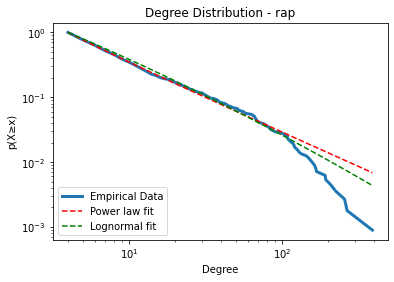

In [407]:
### RAP DEGREE DISTRIBUTION ###
####
# rap_fit.distribution_compare('power_law', 'lognormal')
fig = rap_fit.plot_ccdf(linewidth=3, label='Empirical Data')

# simulated = rap_fit.power_law.generate_random(1000)
# x, y = powerlaw.ccdf(simulated)
# y = rap_fit.power_law.ccdf()
# x = powerlaw.

# plt.plot(x, y*0.5, color='r')

rap_fit.power_law.plot_ccdf(ax=fig, color='r', linestyle='--', label='Power law fit')
rap_fit.lognormal.plot_ccdf(ax=fig, color='g', linestyle='--', label='Lognormal fit')
# rap_fit.truncated_power_law.plot_ccdf(ax=fig, color='b', linestyle='--', label='Exponential Cutoff')
# rap_fit.stretched_exponential.plot_ccdf(ax=fig, color='b', linestyle='--', label='Stretched Exponential')
# rap_fit.lognormal_positive.plot_ccdf(ax=fig, color='b', linestyle='--', label='Lognorm Pos')
# powerlaw.Stretched_Exponential
####
fig.set_ylabel(u"p(X≥x)")
fig.set_xlabel("Degree")
fig.set_title("Degree Distribution - rap")
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles, labels, loc=3)

plt.savefig("figs/rap_deg_dist.png", dpi=300)

In [378]:
rap_fit.supported_distributions

{'power_law': powerlaw.Power_Law,
 'lognormal': powerlaw.Lognormal,
 'exponential': powerlaw.Exponential,
 'truncated_power_law': powerlaw.Truncated_Power_Law,
 'stretched_exponential': powerlaw.Stretched_Exponential,
 'lognormal_positive': powerlaw.Lognormal_Positive}

Values less than or equal to 0 in data. Throwing out 0 or negative values


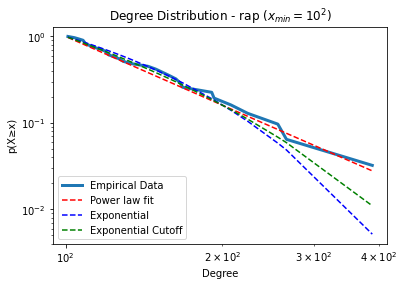

In [414]:
### RAP TAIL DISTRIBUTION

# data = list(dict(rap_graph.degree()).values())
tail_fit = powerlaw.Fit(data, discrete=True, xmin=10**2)
####
# tail_fit.distribution_compare('power_law', 'lognormal')
fig = tail_fit.plot_ccdf(linewidth=3, label='Empirical Data')
tail_fit.power_law.plot_ccdf(ax=fig, color='r', linestyle='--', label='Power law fit')
tail_fit.exponential.plot_ccdf(ax=fig, color='b', linestyle='--', label='Exponential')
# tail_fit.lognormal.plot_ccdf(ax=fig, color='g', linestyle='--', label='Lognormal fit')
tail_fit.truncated_power_law.plot_ccdf(ax=fig, color='g', linestyle='--', label='Exponential Cutoff')
# tail_fit.stretched_exponential.plot_ccdf(ax=fig, color='b', linestyle='--', label='Stretched Exponential')
# tail_fit.lognormal_positive.plot_ccdf(ax=fig, color='b', linestyle='--', label='Lognorm Pos')
# powerlaw.Stretched_Exponential
####
fig.set_ylabel(u"p(X≥x)")
fig.set_xlabel("Degree")
fig.set_title("Degree Distribution - rap ($x_{min}=10^2$)")
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles, labels, loc=3)

plt.savefig("figs/raptail_deg_dist.png", dpi=300)

In [417]:
powerlaw_df = pd.DataFrame(columns=['graph', 'p', 'lognorm', 'lognorm_p', 'exp', 'exp_p', 'cutoff', 'cutoff_p'])

In [404]:
def fit_x(x, xmin=None):
    fit = powerlaw.Fit(x, discrete=True, xmin=xmin)
    alpha = fit.power_law.alpha
    xmin  = fit.power_law.xmin
    return scipy.stats.kstest(x, "powerlaw", args=(alpha, xmin), N=len(x))
    # print('lognorm', scipy.stats.kstest(x, "lognorm", args=(np.mean(x), np.std(x)), N=len(x)))

In [418]:
rap_ks = fit_x(rap_data)
rap_lognorm = rap_fit.distribution_compare("power_law", "lognormal")
rap_exp = rap_fit.distribution_compare("power_law", "exponential")
rap_cutoff = rap_fit.distribution_compare("power_law", "truncated_power_law")

raptail_ks = fit_x(rap_data, xmin=10**2)
raptail_lognorm = tail_fit.distribution_compare("power_law", "lognormal")
raptail_exp = tail_fit.distribution_compare("power_law", "exponential")
raptail_cutoff = tail_fit.distribution_compare("power_law", "truncated_power_law")

edm_ks = fit_x(edm_data)
edm_lognorm = edm_fit.distribution_compare("power_law", "lognormal")
edm_exp = edm_fit.distribution_compare("power_law", "exponential")
edm_cutoff = edm_fit.distribution_compare("power_law", "truncated_power_law")


powerlaw_df = powerlaw_df.append({'graph':'rap', 'p':rap_ks[0], 'lognorm':rap_lognorm[0], 'lognorm_p':rap_lognorm[1], 'exp':rap_exp[0], 'exp_p':rap_exp[1], 'cutoff':rap_cutoff[0], 'cutoff_p':rap_cutoff[1]}, ignore_index=True)

powerlaw_df = powerlaw_df.append({'graph':'rap_tail', 'p':raptail_ks[0], 'lognorm':raptail_lognorm[0], 'lognorm_p':raptail_lognorm[1], 'exp':raptail_exp[0], 'exp_p':raptail_exp[1], 'cutoff':raptail_cutoff[0], 'cutoff_p':raptail_cutoff[1]}, ignore_index=True)

powerlaw_df = powerlaw_df.append({'graph':'edm', 'p':edm_ks[0], 'lognorm':edm_lognorm[0], 'lognorm_p':edm_lognorm[1], 'exp':edm_exp[0], 'exp_p':edm_exp[1], 'cutoff':edm_cutoff[0], 'cutoff_p':edm_cutoff[1]}, ignore_index=True)

In [419]:
powerlaw_df

,graph,p,lognorm,lognorm_p,exp,exp_p,cutoff,cutoff_p
0,rap,0.760996,-2.065765,0.114556,436.975720,4.266612e-22,-5.339098,0.001084
1,rap_tail,0.991425,-0.497565,0.511032,-0.274663,8.418669e-01,-0.535049,0.300923
2,edm,0.942029,-0.362066,0.582062,24.848240,2.737730e-02,-0.465492,0.334607


In [405]:
print(rap_fit.distribution_compare("power_law", "lognormal"))
print(rap_fit.distribution_compare("power_law", "exponential"))
print(rap_fit.distribution_compare("power_law", "truncated_power_law"))

(-2.065764792026547, 0.11455591687341816)
(436.97571993287016, 4.266612019242614e-22)
Assuming nested distributions
(-5.339097680611706, 0.0010840576640248623)


In [486]:
rap_ks = rap_fit.power_law.KS()
edm_ks = edm_fit.power_law.KS()

D:\Anaconda_env\DataSci\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


In [479]:
rap_synthetic = powerlaw.Power_Law(xmin=rap_fit.xmin, parameters=[rap_fit.alpha])
rap_sim_ks = []

for i in range(1000):
    rap_sim_data = rap_synthetic.generate_random(1123)
    rap_sim_fit = powerlaw.Fit(rap_sim_data)
    rap_sim_ks.append(rap_sim_fit.power_law.KS())

law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating 

In [483]:
rap_greater = list(filter(lambda x: x > rap_ks, rap_sim_ks))
len(rap_greater)/len(rap_sim_ks)

In [495]:
rap_tail_fit.n

31.0

In [498]:
def powerlaw_pval(fit, iterations=1000):
    fit_ks = fit.power_law.KS()
    synthetic = powerlaw.Power_Law(xmin=fit.xmin, parameters=[fit.alpha])
    n = int(fit.n)
    sim_ks = list()

    for i in range(iterations):
        sim_data = synthetic.generate_random(n)
        sim_fit = powerlaw.Fit(sim_data)
        sim_ks.append(sim_fit.power_law.KS())

    greater = list(filter(lambda x: x > fit_ks, sim_ks))
    pval = len(greater)/len(sim_ks)
    return pval

In [500]:
rap_tail_p = powerlaw_pval(rap_tail_fit, 3000)

law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating 

In [501]:
rap_tail_p

0.558

In [493]:
edm_synthetic = powerlaw.Power_Law(xmin=edm_fit.xmin, parameters=[edm_fit.alpha])
edm_sim_ks = []

for i in range(1000):
    edm_sim_data = edm_synthetic.generate_random(105)
    edm_sim_fit = powerlaw.Fit(edm_sim_data)
    edm_sim_ks.append(edm_sim_fit.power_law.KS())

law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating 

In [494]:
edm_greater = list(filter(lambda x: x > edm_ks, edm_sim_ks))
len(edm_greater)/len(edm_sim_ks)

0.785

In [526]:
rap_fit.alpha

2.059619317729182

In [528]:
rap_fit.truncated_power_law.parameter2

0.0025923684613481076

In [513]:
powerlaw_deg_res = pd.DataFrame(columns=['rap', 'electronic'], index=['x_min', 'alpha', 'sigma', 'p_val'])

In [514]:
powerlaw_deg_res

,rap,electronic
n,NaN,NaN
$x_{min}$,NaN,NaN
$\sigma$,NaN,NaN


In [510]:
len(rap_fit.data)

1123

In [374]:
print(rap_fit.alpha)
print(rap_fit.sigma)

2.059619317729182
0.03161986337766397


In [376]:
print(fit.alpha)
print(fit.sigma)

3.6285470490171545
0.47210098663031397


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
D:\Anaconda_env\DataSci\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
D:\Anaconda_env\DataSci\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
D:\Anaconda_env\DataSci\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


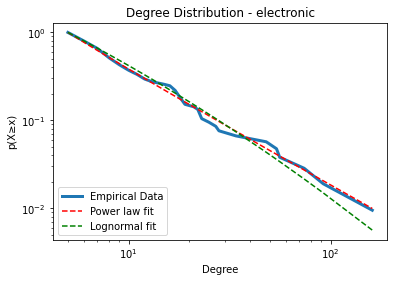

In [180]:
data = list(dict(edm_graph.degree()).values())
fit = powerlaw.Fit(data, discrete=True)
####
# fit.distribution_compare('power_law', 'lognormal')
fig = fit.plot_ccdf(linewidth=3, label='Empirical Data')
fit.power_law.plot_ccdf(ax=fig, color='r', linestyle='--', label='Power law fit')
fit.lognormal.plot_ccdf(ax=fig, color='g', linestyle='--', label='Lognormal fit')
# fit.truncated_power_law.plot_ccdf(ax=fig, color='b', linestyle='--', label='Exponential Cutoff')
####
fig.set_ylabel(u"p(X≥x)")
fig.set_xlabel("Degree")
fig.set_title("Degree Distribution - electronic")
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles, labels, loc=3)

plt.savefig("figs/edm_deg_dist.png", dpi=300)

In [181]:
print(fit.alpha)
print(fit.sigma)

2.2910601847805507
0.12599457285082863


In [63]:
fit = powerlaw.Fit(data, discrete=True, xmin=4)

Values less than or equal to 0 in data. Throwing out 0 or negative values
D:\Anaconda_env\DataSci\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


In [74]:
fit.truncated_power_law.parameter2

0.0025923684613481076

## Strength Distribution

In [529]:
rap_str_data = sorted(list(dict(rap_graph.degree(weight='weight')).values()))
edm_str_data = sorted(list(dict(edm_graph.degree(weight='weight')).values()))

rap_str_fit = powerlaw.Fit(rap_str_data, discrete=True)
edm_str_fit = powerlaw.Fit(edm_str_data, discrete=True)

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
D:\Anaconda_env\DataSci\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
D:\Anaconda_env\DataSci\lib\site-packages\powerlaw.py:699: RuntimeWarning: divide by zero encountered in true_divide
  (CDF_diff**2) /
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


D:\Anaconda_env\DataSci\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


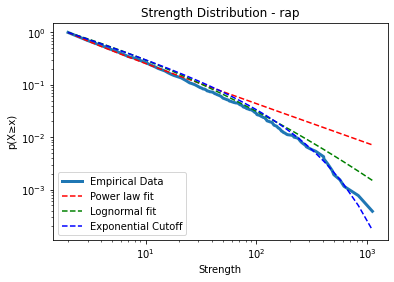

In [531]:
### RAP STRENGTH DISTRIBUTION ###
####
# rap_str_fit.distribution_compare('power_law', 'lognormal')
fig = rap_str_fit.plot_ccdf(linewidth=3, label='Empirical Data')

# simulated = rap_str_fit.power_law.generate_random(1000)
# x, y = powerlaw.ccdf(simulated)
# y = rap_str_fit.power_law.ccdf()
# x = powerlaw.

# plt.plot(x, y*0.5, color='r')

rap_str_fit.power_law.plot_ccdf(ax=fig, color='r', linestyle='--', label='Power law fit')
rap_str_fit.lognormal.plot_ccdf(ax=fig, color='g', linestyle='--', label='Lognormal fit')
rap_str_fit.truncated_power_law.plot_ccdf(ax=fig, color='b', linestyle='--', label='Exponential Cutoff')
# rap_str_fit.stretched_exponential.plot_ccdf(ax=fig, color='b', linestyle='--', label='Stretched Exponential')
# rap_str_fit.lognormal_positive.plot_ccdf(ax=fig, color='b', linestyle='--', label='Lognorm Pos')
# powerlaw.Stretched_Exponential
####
fig.set_ylabel(u"p(X≥x)")
fig.set_xlabel("Strength")
fig.set_title("Strength Distribution - rap")
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles, labels, loc=3)

plt.savefig("figs/rap_str_dist.png", dpi=300)

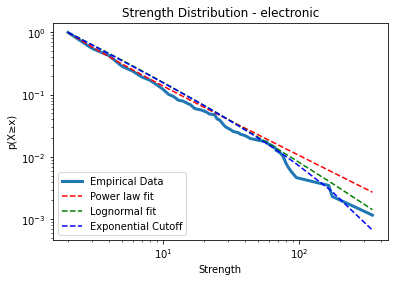

In [567]:
### edm STRENGTH DISTRIBUTION ###
####
# edm_str_fit.distribution_compare('power_law', 'lognormal')
fig = edm_str_fit.plot_ccdf(linewidth=3, label='Empirical Data')

# simulated = edm_str_fit.power_law.generate_random(1000)
# x, y = powerlaw.ccdf(simulated)
# y = edm_str_fit.power_law.ccdf()
# x = powerlaw.

# plt.plot(x, y*0.5, color='r')

edm_str_fit.power_law.plot_ccdf(ax=fig, color='r', linestyle='--', label='Power law fit')
edm_str_fit.lognormal.plot_ccdf(ax=fig, color='g', linestyle='--', label='Lognormal fit')
# edm_str_fit.exponential.plot_ccdf(ax=fig, color='b', linestyle='--', label='Exponential')
edm_str_fit.truncated_power_law.plot_ccdf(ax=fig, color='b', linestyle='--', label='Exponential Cutoff')

# edm_str_fit.stretched_exponential.plot_ccdf(ax=fig, color='c', linestyle='--', label='Stretched Exponential')
# edm_str_fit.lognormal_positive.plot_ccdf(ax=fig, color='b', linestyle='--', label='Lognorm Pos')
# powerlaw.Stretched_Exponential
####
fig.set_ylabel(u"p(X≥x)")
fig.set_xlabel("Strength")
fig.set_title("Strength Distribution - electronic")
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles, labels, loc=3)

plt.savefig("figs/edm_str_dist.png", dpi=300)

In [538]:
rap_str_p = powerlaw_pval(rap_str_fit)
edm_str_p = powerlaw_pval(edm_str_fit)

law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating 

In [539]:
print(rap_str_p)
print(edm_str_p)

0.0
0.025


In [545]:
print(rap_fit.alpha, rap_fit.sigma)
print(edm_fit.alpha, edm_fit.sigma)

2.059619317729182 0.03161986337766397
2.2910601847805507 0.12599457285082863


In [546]:
print(rap_str_fit.alpha, rap_str_fit.sigma)
print(edm_str_fit.alpha, edm_str_fit.sigma)

1.7512556855168575 0.01477316374323054
2.0920195684089027 0.03725922685434347


In [541]:
powerlaw_df = pd.DataFrame(columns=['graph', 'p', 'lognorm', 'lognorm_p', 'exp', 'exp_p', 'cutoff', 'cutoff_p'])

In [543]:
# rap_ks = fit_x(rap_data)
rap_lognorm = rap_str_fit.distribution_compare("power_law", "lognormal")
rap_exp = rap_str_fit.distribution_compare("power_law", "exponential")
rap_cutoff = rap_str_fit.distribution_compare("power_law", "truncated_power_law")

# raptail_ks = fit_x(rap_data, xmin=10**2)
# raptail_lognorm = tail_fit.distribution_compare("power_law", "lognormal")
# raptail_exp = tail_fit.distribution_compare("power_law", "exponential")
# raptail_cutoff = tail_fit.distribution_compare("power_law", "truncated_power_law")

# edm_ks = fit_x(edm_data)
edm_lognorm = edm_str_fit.distribution_compare("power_law", "lognormal")
edm_exp = edm_str_fit.distribution_compare("power_law", "exponential")
edm_cutoff = edm_str_fit.distribution_compare("power_law", "truncated_power_law")


powerlaw_df = powerlaw_df.append({'graph':'rap', 'p':rap_str_p, 'lognorm':rap_lognorm[0], 'lognorm_p':rap_lognorm[1], 'exp':rap_exp[0], 'exp_p':rap_exp[1], 'cutoff':rap_cutoff[0], 'cutoff_p':rap_cutoff[1]}, ignore_index=True)

# powerlaw_df = powerlaw_df.append({'graph':'rap_tail', 'p':raptail_ks[0], 'lognorm':raptail_lognorm[0], 'lognorm_p':raptail_lognorm[1], 'exp':raptail_exp[0], 'exp_p':raptail_exp[1], 'cutoff':raptail_cutoff[0], 'cutoff_p':raptail_cutoff[1]}, ignore_index=True)|

powerlaw_df = powerlaw_df.append({'graph':'edm', 'p':edm_str_p, 'lognorm':edm_lognorm[0], 'lognorm_p':edm_lognorm[1], 'exp':edm_exp[0], 'exp_p':edm_exp[1], 'cutoff':edm_cutoff[0], 'cutoff_p':edm_cutoff[1]}, ignore_index=True)

Assuming nested distributions
Assuming nested distributions


In [544]:
powerlaw_df

,graph,p,lognorm,lognorm_p,exp,exp_p,cutoff,cutoff_p
0,rap,0.000,-26.350159,6.866347e-07,1639.134903,6.891570e-33,-28.885281,2.942091e-14
1,edm,0.025,-2.252321,1.746270e-01,382.875239,1.965348e-07,-2.498421,2.539361e-02
